In [1]:
#Reference https://python-kurs.github.io/sommersemester_2019/units/S01E07#
import satpy
from satpy import Scene, MultiScene
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyresample import geometry
import os

In [2]:
os.chdir('/home/jvillarreal/Documents/phd/dataset')

In [3]:
dateien = ["MYD021KM.A2013122.1140.061.2018046032403.hdf"]
files = {"modis_l1b" : dateien}

mod02_scn = Scene(filenames=files)
mod02_scn.load(["true_color"],resolution=1000)
#mod02_scn.show("true_color")  #natural color dont show a good performance


In [1]:


#mod02_scn.save_dataset(composite_name, './modis_%s_rgb_%s_%s.png' %
 #                (composite_name, lcn.attrs['start_time'].strftime('%Y%m%d%H%M'), areaid))



In [29]:
area_id = "Griechenland"
description = "Griechenland und Umgebung in Mercator-Projektion"
proj_id = "Griechenland"
proj_dict = {"proj": "merc", "lat_ts": 50, 'lon_0': 9}

width = 400    # width of the result domain in pixels
height = 400   # height of the result domain in pixels

llx = 4.5E5   # projection x coordinate of lower left corner of lower left pixel
lly =  47.5E5    # projection y coordinate of lower left corner of lower left pixel
urx =  14.5E5    # projection x coordinate of upper right corner of upper right pixel
ury =  54.5E5    # projection y coordinate of upper right corner of upper right pixel

area_extent = (llx,lly,urx,ury)
area_def_germany = geometry.AreaDefinition(area_id, proj_id, description, proj_dict, width, height, area_extent)

#blended_scene = local_scn.blend()

/home/jvillarreal/miniconda3/envs/modis/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in log
  return func(*(_execute_task(a, cache) for a in args))
/home/jvillarreal/miniconda3/envs/modis/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in log
  return func(*(_execute_task(a, cache) for a in args))
/home/jvillarreal/miniconda3/envs/modis/lib/python3.8/site-packages/pyresample/geometry.py:1493: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_params = self.crs.to_proj4()
/home/jvillarreal/miniconda3/envs/modis/lib/python3.8/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-forma

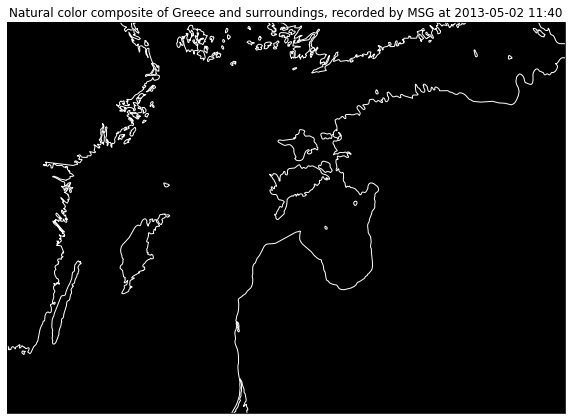

In [35]:
scn=mod02_scn
local_scn = scn.resample(area_def_germany)

# First, we have to transpose the natural color composite values to a shape that can be interpreted 
# by the imshow method: (M,N,3)
image = np.asarray(local_scn["true_color"]).transpose(1,2,0)

# Then we scale the values to the range between 0 and 1, clipping the lower and upper percentiles
# so that a potential contrast decrease caused by outliers is eliminated.
image = np.interp(image, (np.percentile(image,1), np.percentile(image,99)), (0, 1))

# Now we "copy" the coordinate reference system of our composite data set...
crs = local_scn["true_color"].attrs["area"].to_cartopy_crs()

# ... and use it to generate an axes in our figure with the same CRS
fig = plt.subplots(figsize=(10,10))
ax = plt.axes(projection=crs)

# Now we can add some coastlines...
ax.coastlines(resolution="10m", color="white")

# ... and a lat/lon grid:
ax.gridlines(xlocs=range(4,14,5),ylocs=range(40,55,5))

# In the end, we can plot our image data...
ax.imshow(image, transform=crs, extent=crs.bounds, origin="upper")

# and add a title to our plot
plt.title("Natural color composite of Greece and surroundings, recorded by MSG at " + local_scn.attrs["start_time"].strftime("%Y-%m-%d %H:%M"))

# Finally, we can show the plot to the user:
plt.show()

/home/jvillarreal/miniconda3/envs/modis/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in log
  return func(*(_execute_task(a, cache) for a in args))
/home/jvillarreal/miniconda3/envs/modis/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in log
  return func(*(_execute_task(a, cache) for a in args))


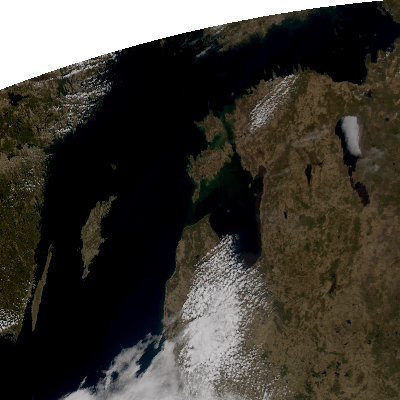

In [30]:
local_scn = mod02_scn.resample(area_def_germany)
local_scn.show("true_color")  

In [4]:
area_id = "Griechenland"
description = "Griechenland und Umgebung in Mercator-Projektion"
proj_id = "Griechenland"
proj_dict = {"proj": "merc", "lat_ts": 53, 'lon_0': 13}

width = 400    # width of the result domain in pixels
height = 400   # height of the result domain in pixels

llx = -10E5   # projection x coordinate of lower left corner of lower left pixel
lly =  27E5   # projection y coordinate of lower left corner of lower left pixel
urx =  10E5   # projection x coordinate of upper right corner of upper right pixel
ury =  47E5   # projection y coordinate of upper right corner of upper right pixel

area_extent = (llx,lly,urx,ury)
area_def_germany = geometry.AreaDefinition(area_id, proj_id, description, proj_dict, width, height, area_extent)

#blended_scene = local_scn.blend()

/home/jvillarreal/miniconda3/envs/modis/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in log
  return func(*(_execute_task(a, cache) for a in args))


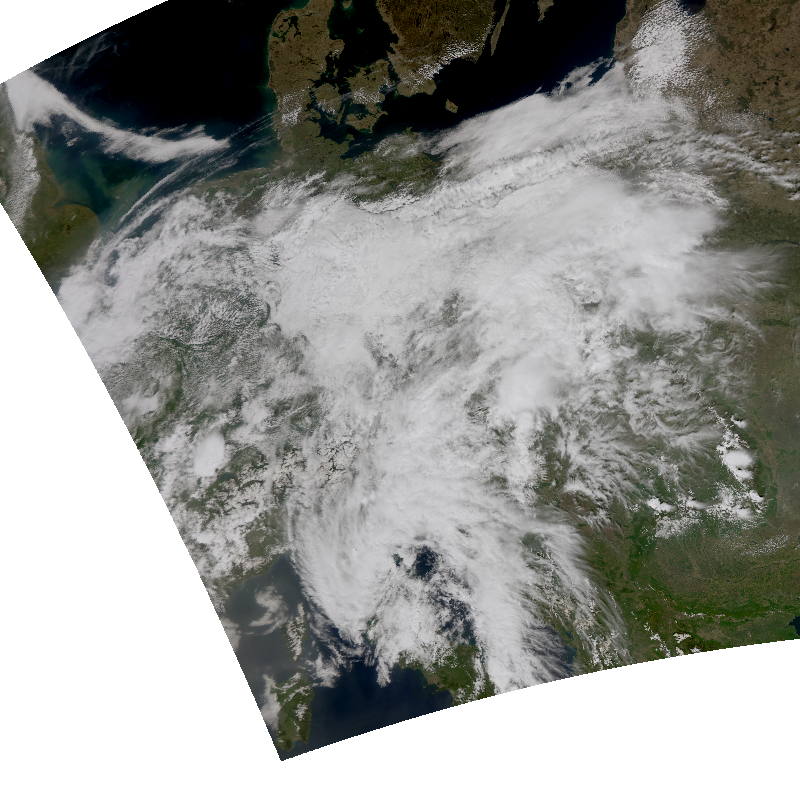

In [118]:
local_scn = mod02_scn.resample(area_def_germany)
local_scn.show("true_color")  

/home/jvillarreal/miniconda3/envs/modis/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in log
  return func(*(_execute_task(a, cache) for a in args))
/home/jvillarreal/miniconda3/envs/modis/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in log
  return func(*(_execute_task(a, cache) for a in args))
/home/jvillarreal/miniconda3/envs/modis/lib/python3.8/site-packages/pyresample/geometry.py:1493: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_params = self.crs.to_proj4()
/home/jvillarreal/miniconda3/envs/modis/lib/python3.8/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-forma

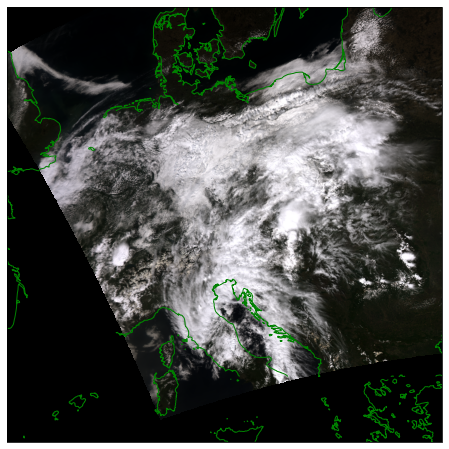

In [101]:
#local_scn = mod02_scn.resample("worldeqc30km")



image = np.asarray(local_scn["true_color"]).transpose(1,2,0)
image = np.interp(image, (np.nanpercentile(image,1), np.nanpercentile(image,99)), (0, 1))

crs = local_scn["true_color"].attrs["area"].to_cartopy_crs()

fig = plt.subplots(figsize=(15,8))
ax = plt.axes(projection=crs)
ax.coastlines(resolution="10m",color="green")
ax.imshow(image, transform=crs, extent=crs.bounds, origin="upper")
plt.show()


In [102]:
#If there are different scenes:
#scenes = [
#    Scene(reader='modis_l1b', filenames=["MYD021KM.A2013122.1140.061.2018046032403.hdf"])    ]

#mscn = MultiScene(scenes)
#mscn.load(['true_color'],resolution=1000)
#mscn_res = mscn.resample(area_def_germany)
#blended_scene = mscn_res.blend()
#blended_scene.show("true_color")

### natural_color

In [121]:
dateien = ["MYD021KM.A2013122.1140.061.2018046032403.hdf"]
files = {"modis_l1b" : dateien}

mod02_scn = Scene(filenames=files)
mod02_scn.load(["natural_color"],resolution=1000)
#mod02_scn.show("natural_color")  #natural color dont show a good performance

/home/jvillarreal/miniconda3/envs/modis/lib/python3.8/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()
/home/jvillarreal/miniconda3/envs/modis/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in log
  return func(*(_execute_task(a, cache) for a in args))
/home/jvillarreal/miniconda3/envs/modis/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in log
  return func(*(_execute_task(a, cache) for a in args))
/home/jvillarreal/miniconda3/envs/modis/lib/python3.8/site-packages/pyresample/geometry.py:1493: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-fo

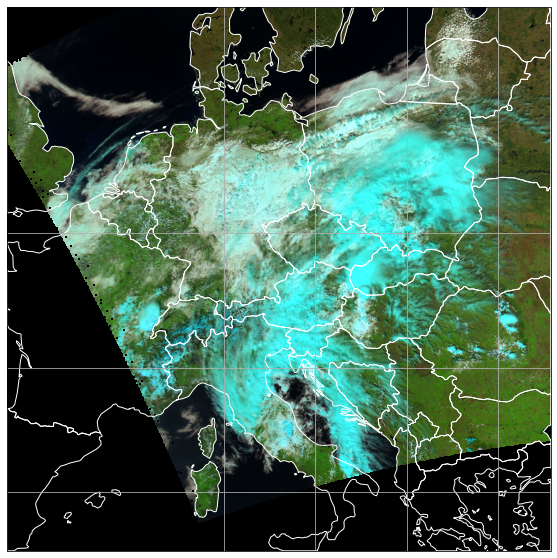

In [82]:
import cartopy.feature as cfeature


#local_scn = mod02_scn.resample("worldeqc30km")
local_scn = mod02_scn.resample(area_def_germany)

image = np.asarray(local_scn["natural_color"]).transpose(1,2,0)

image = np.interp(image, (np.nanpercentile(image,1), np.nanpercentile(image,99)), (0, 1))
crs = local_scn["natural_color"].attrs["area"].to_cartopy_crs()
fig = plt.subplots(figsize=(10,10))
ax = plt.axes(projection=crs)
ax.gridlines(xlocs=range(10,45,5),ylocs=range(25,55,5))
states_provinces = cfeature.NaturalEarthFeature(
    category="cultural",
    name="admin_0_countries",
    scale="50m",
    facecolor="none")
ax.add_feature(states_provinces, edgecolor="white")
ax.imshow(image, transform=crs, extent=crs.bounds, origin="upper")
#plt.title("Natural color composite of Greece and surroundings, recorded by MODIS at " + local_scn.attrs["start_time"].strftime("%Y-%m-%d %H:%M"))
plt.show()

### other

In [ ]:
from matplotlib import pyplot
from rasterio.plot import show
from rasterio.plot import show_hist
from pyhdf.SD import SD, SDC



fig, (axrgb, axhist) = pyplot.subplots(1, 2, figsize=(14,7))
show(rgb, ax=axrgb)
show_hist(rgb, bins=50, histtype='stepfilled',lw=0.0, stacked=False, alpha=0.3, ax=axhist)
pyplot.show()

In [ ]:
'to complete! plot RGB'
# setup Lambert Conformal basemap. #https://matplotlib.org/basemap/users/geography.html
# set resolution=None to skip processing of boundary datasets.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=30.)
m.bluemarble()

data=rgb_out[1000:1600,400:1000,1]
x, y = m(subset_longitude, subset_latitud)
m.pcolormesh(x,y,data)
plt.show()
